# M506 basic analysis

The M506 is the normal mounted Trisonica anemometer, this notebook gives a qualitative idea on how is going and the transformation needed to the reference system

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from wind_tools import *
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib
#matplotlib.use('Qt5Agg')

import matplotlib.pyplot as plt
sns.set()
import plotly.express as px

matplotlib.rcParams['figure.figsize'] = (16,10)

## Load data

In [ ]:
proc_dir = Path("2020_data/data_20200724_final_field_install/processed")

wm1_path = proc_dir / "eddypro_WM1_2min_full_output_2020-08-03T154346_exp.csv"
m6_path = proc_dir / "eddypro_TRS_M506_full_output_2020-08-04T083451_exp.csv"


cache_dir = Path("data_cache")
start_date = '2020-07-24 13:00:00'
end_date = '2020-08-03 10:00:00'

wind_cols = ['u_unrot','v_unrot', 'w_unrot', 'wind_speed', 'wind_dir']
wind_comp_rename = {'u_unrot': 'u', 'v_unrot': 'v', 'w_unrot': 'w'}

In [ ]:
wm1, m6 = map(
    lambda p: load_ep_cache(p, cache_dir= cache_dir)
    .loc[start_date:end_date]
    .loc[:,wind_cols]
    .rename(columns=wind_comp_rename),
    [wm1_path, m6_path])

**Rotate WM1 components** EP does not rotate them according to installation offset

In [ ]:
wm1 = rotate_wind_ang(wm1, 310).interpolate() # need to remove a NaN 

# Explore data

## wind speed

array([<AxesSubplot:title={'center':'wind_speed'}, xlabel='date_time'>],
      dtype=object)

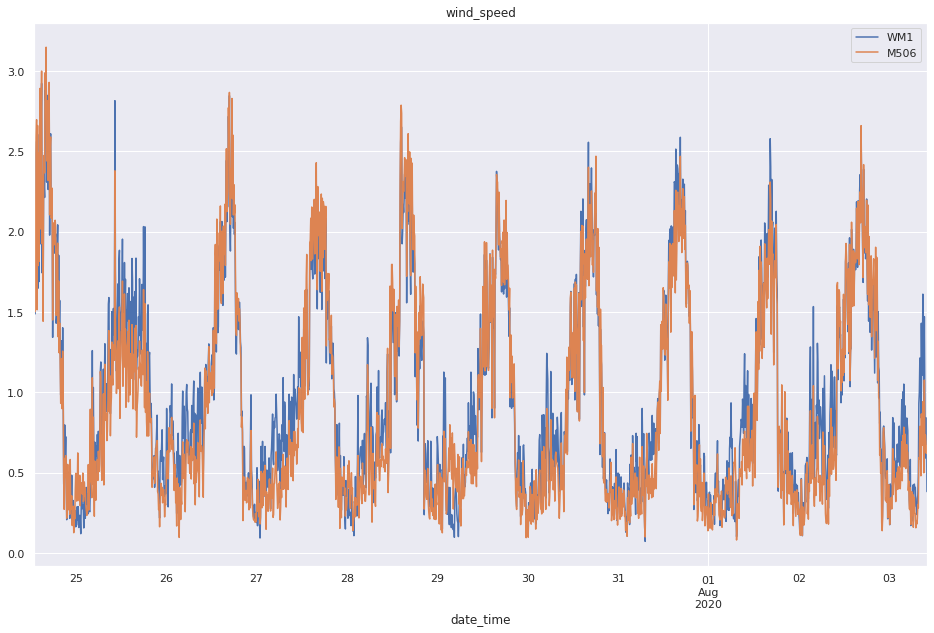

In [ ]:
plot_components(resample([wm1, m6], '8min'),('wind_speed', ), plot_info=[{'label': 'WM1'}, {'label': 'M506'}])

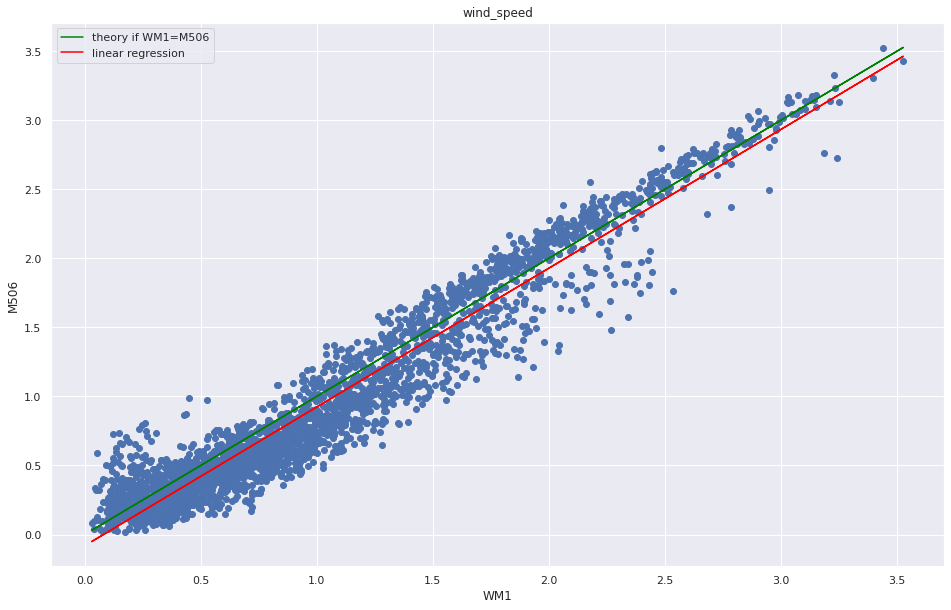

In [ ]:
plot_components_scatter([wm1, m6], ('wind_speed', ), figsize=(16,10), plot_info=[{'label': 'WM1'}, {'label': 'M506'}])

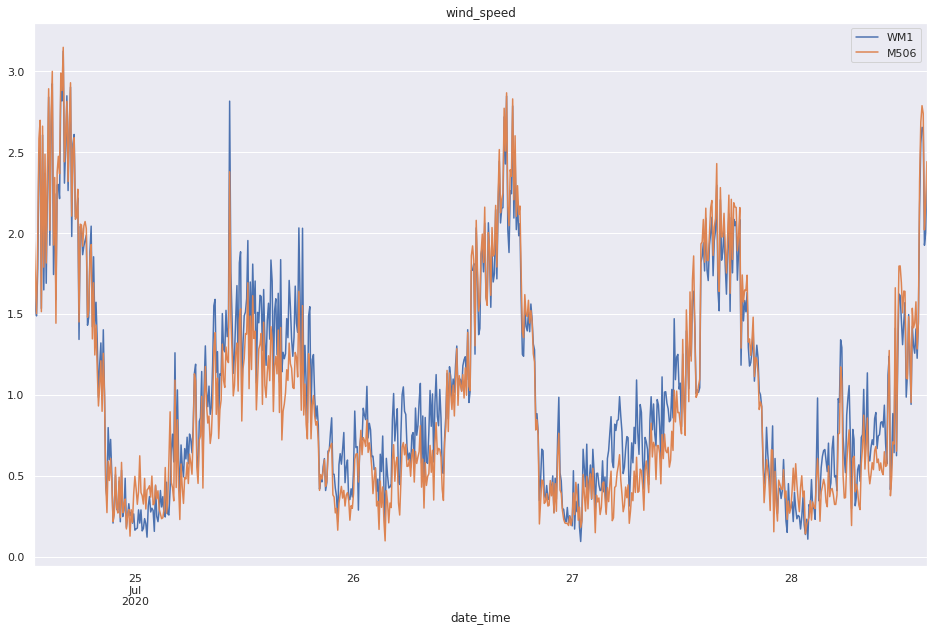

In [ ]:
plot_components(resample([wm1, m6], '8min'),('wind_speed', ), plot_info=[{'label': 'WM1'}, {'label': 'M506'}])

## u

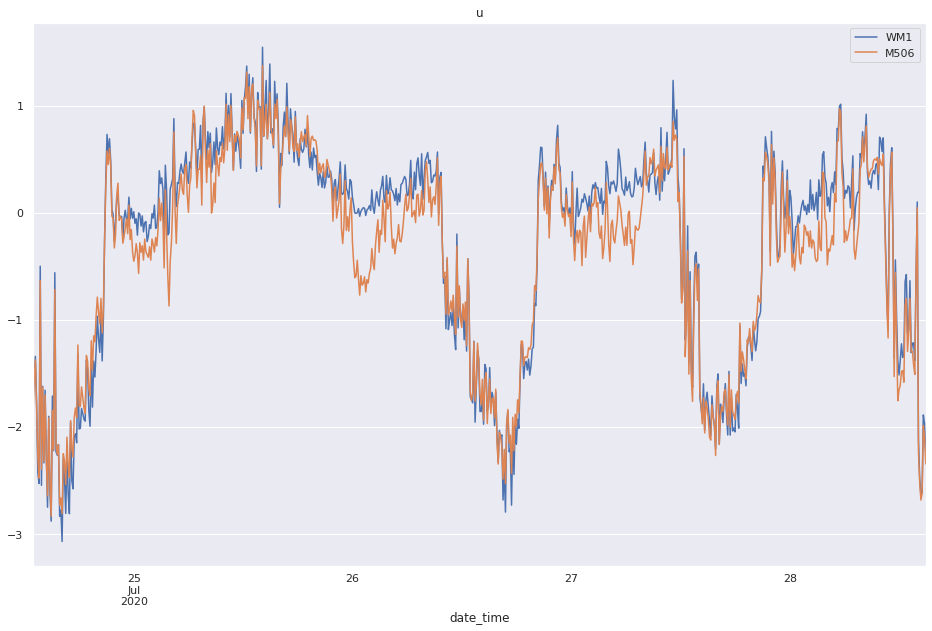

In [ ]:
plot_components(resample([wm1, m6], '8min'),('u', ), plot_info=[{'label': 'WM1'}, {'label': 'M506'}])

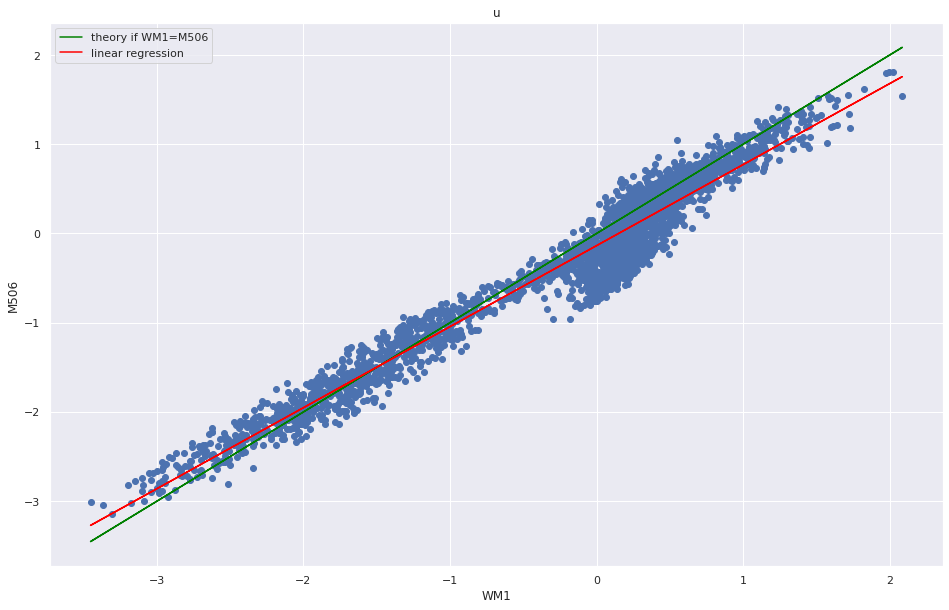

In [ ]:
plot_components_scatter([wm1, m6], ('u', ), figsize=(16,10), plot_info=[{'label': 'WM1'}, {'label': 'M506'}])

## v

Need to take into account that on the V direction is almost parallel to the mouting structure so there can be interference

array([<AxesSubplot:title={'center':'v'}, xlabel='date_time'>],
      dtype=object)

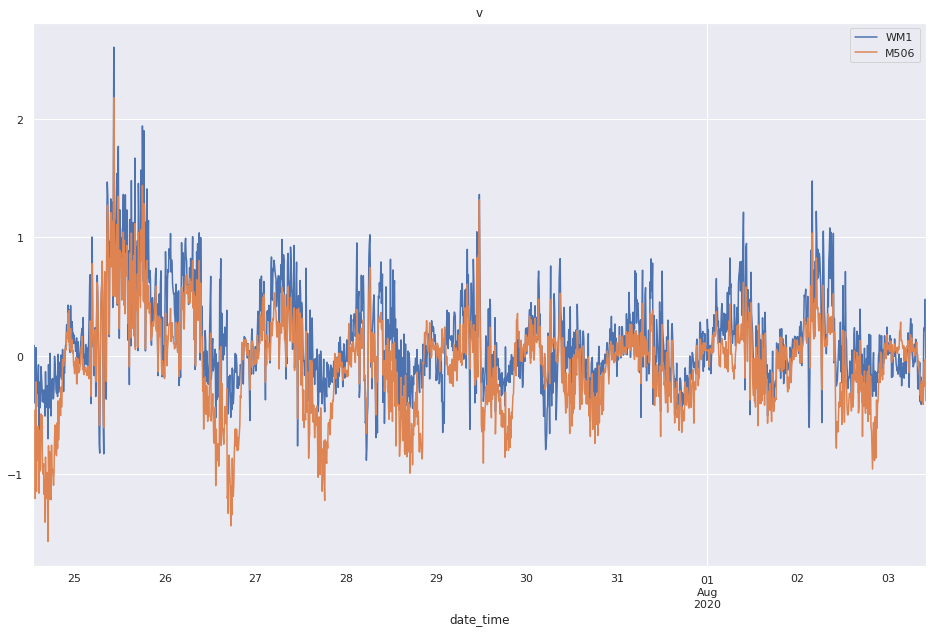

In [ ]:
plot_components(resample([wm1, m6], '8min'),('v', ), plot_info=[{'label': 'WM1'}, {'label': 'M506'}])

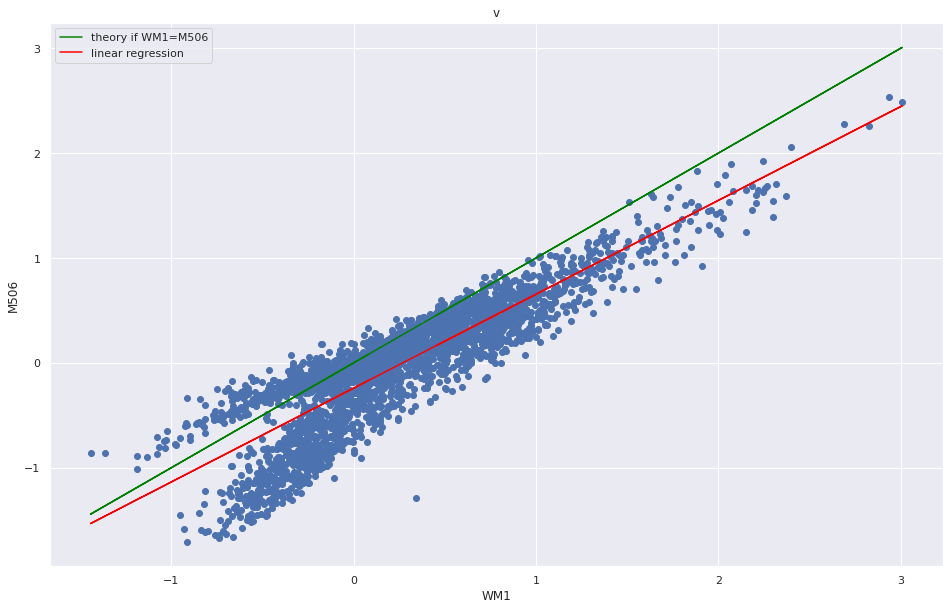

In [ ]:
plot_components_scatter([wm1, m6], ('v', ), figsize=(16,10), plot_info=[{'label': 'WM1'}, {'label': 'M506'}])

## w

can be worse but still rather bad

array([<AxesSubplot:title={'center':'w'}, xlabel='date_time'>],
      dtype=object)

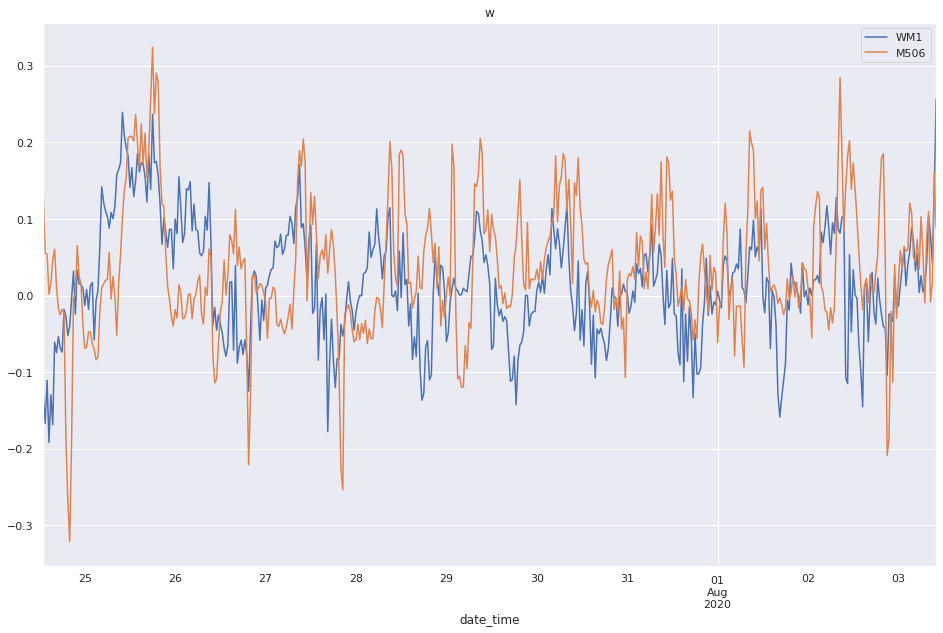

In [ ]:
plot_components(resample([wm1, m6], '30min'), ('w', ), plot_info=[{'label': 'WM1'}, {'label': 'M506'}])

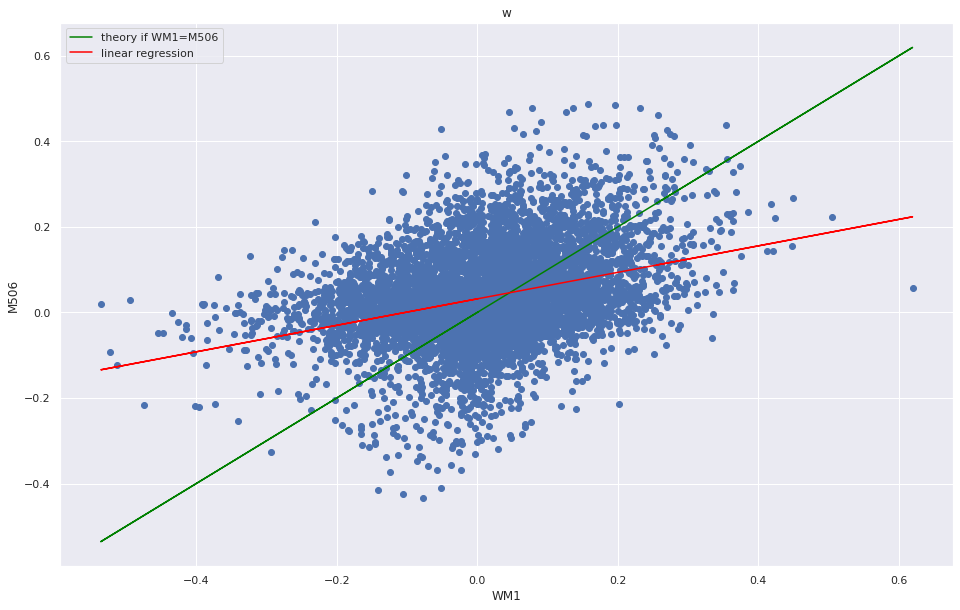

In [ ]:
plot_components_scatter([wm1, m6], ('w', ), figsize=(16,10), plot_info=[{'label': 'WM1'}, {'label': 'M506'}])

## But the Direction ...
looks bad :(

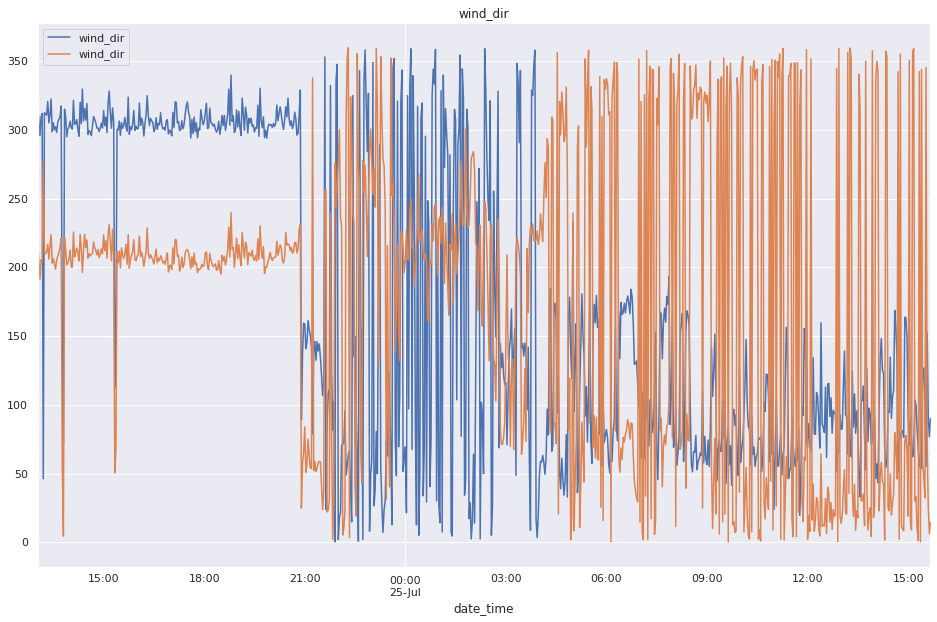

In [ ]:
plot_components([wm1[:800], m6[:800]], ('wind_dir',))

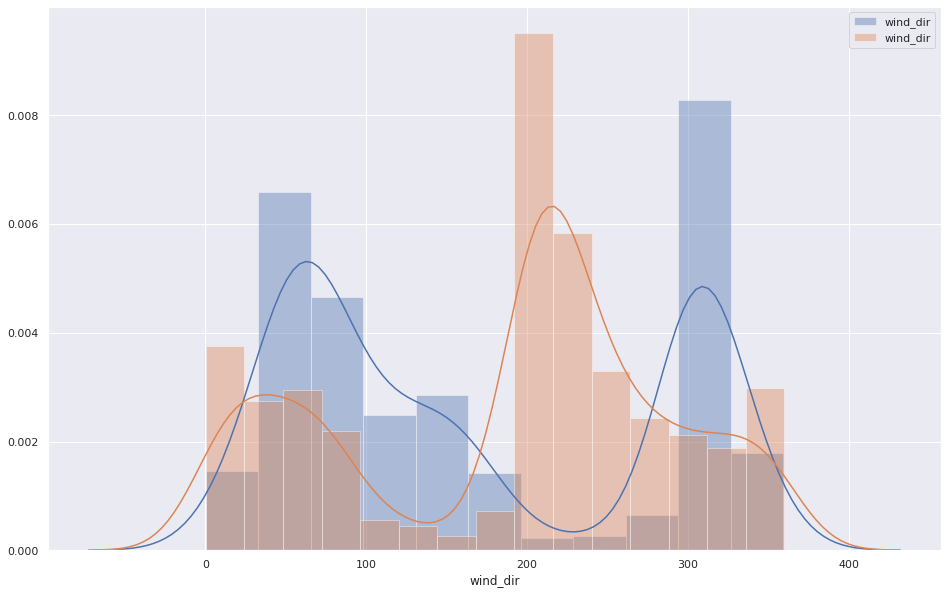

In [ ]:
plot_dist_comp([wm1, m6], ('wind_dir',))

## Just rotate by 27°

27° N is the rough average of the reading of the compass sensor on M506 (would love to know more about this sensor but there is nothing in the datasheet), while the estimated offset in the field with manual compass is 0° N, hence the idea to try to rotate by 27°.

TODO need to get a more exact number

**TODO** need to have better plots

In [ ]:
m6r = rotate_wind_ang(m6, 27)

In [ ]:
m6r = add_wind_dir(m6r) # recalc wind dir

**Warning** direction data cannot be resampled with normal mean

array([<AxesSubplot:title={'center':'wind_dir'}, xlabel='date_time'>],
      dtype=object)

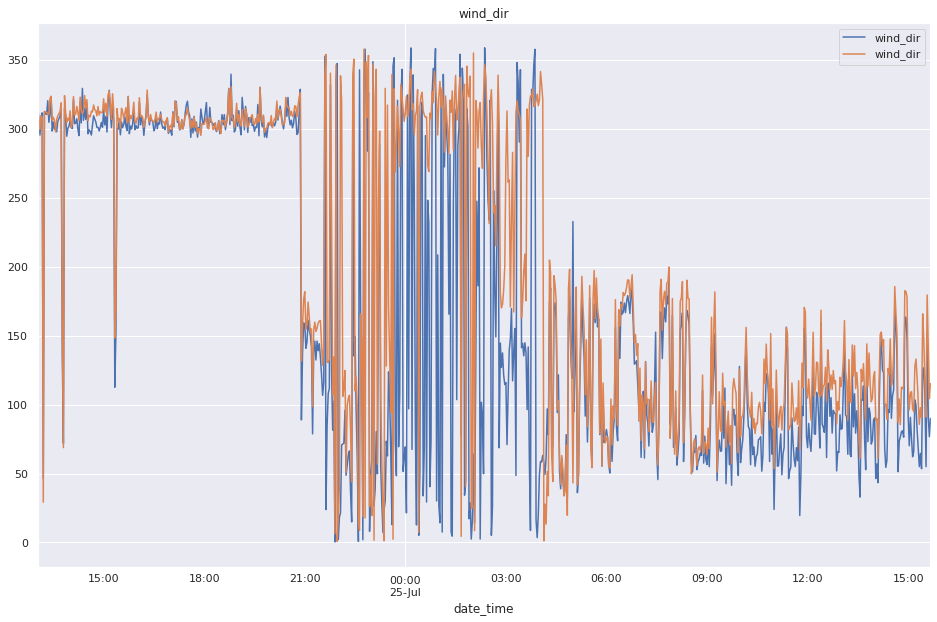

In [ ]:
plot_components([wm1[:800], m6r[:800]], ('wind_dir',))

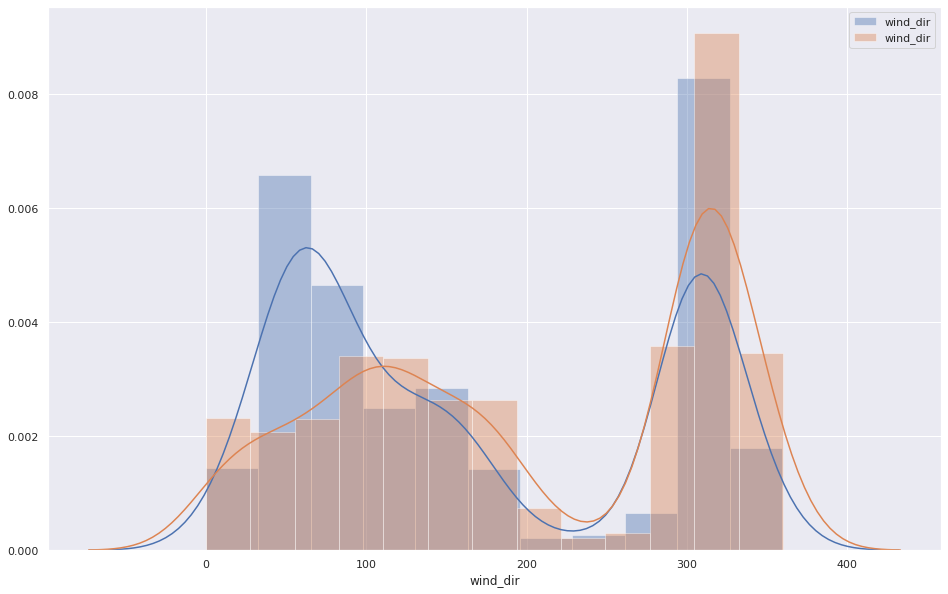

In [ ]:
plot_dist_comp([wm1, m6r], ('wind_dir',))

### Ci siamooo ma... the v is way worse now

array([<AxesSubplot:title={'center':'v'}, xlabel='date_time'>],
      dtype=object)

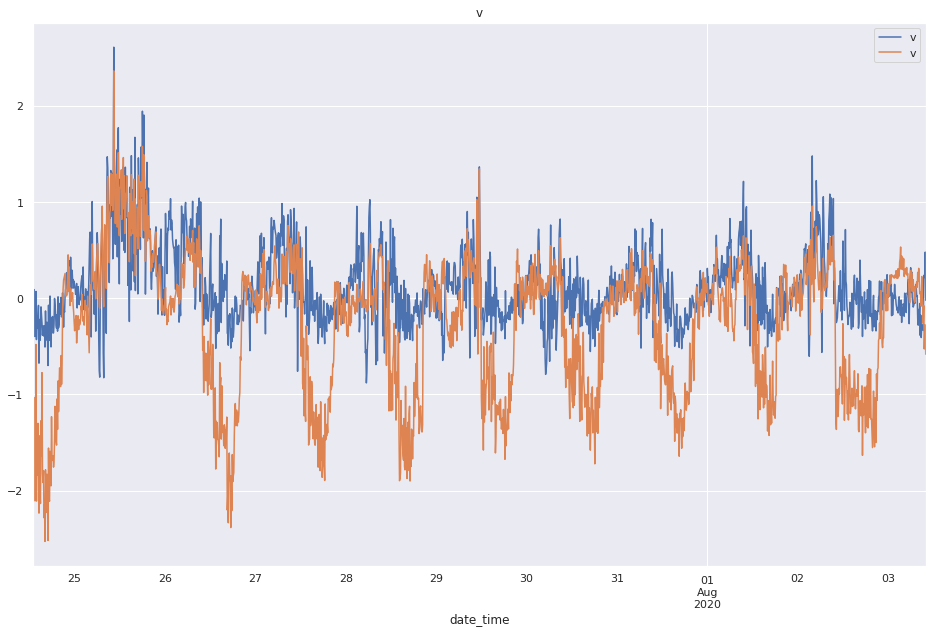

In [ ]:
plot_components(resample([wm1, m6r], '8min'), 'v')

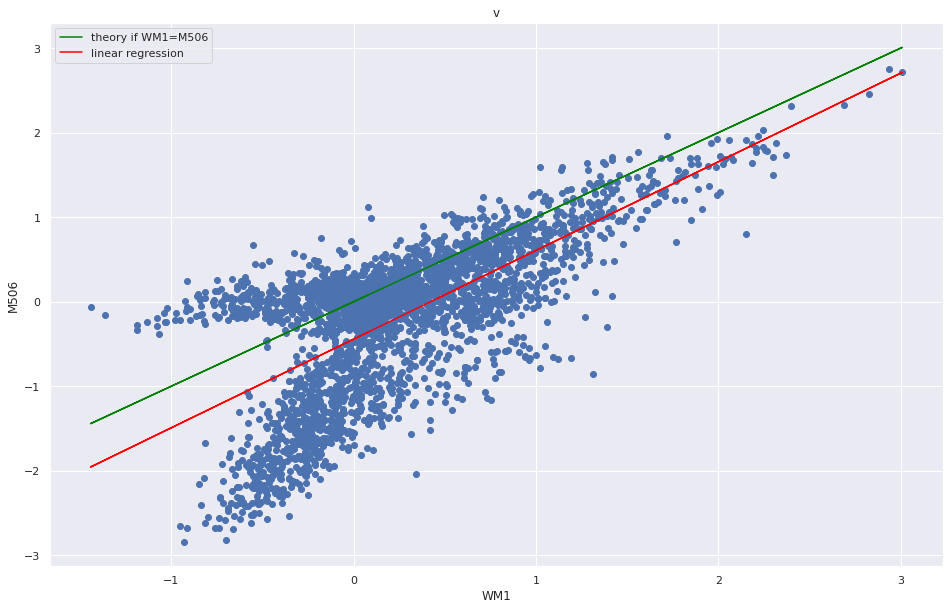

In [ ]:
plot_components_scatter([wm1, m6r], ('v', ), figsize=(16,10), plot_info=[{'label': 'WM1'}, {'label': 'M506'}])

### u is a bit worse as well

array([<AxesSubplot:title={'center':'u'}, xlabel='date_time'>],
      dtype=object)

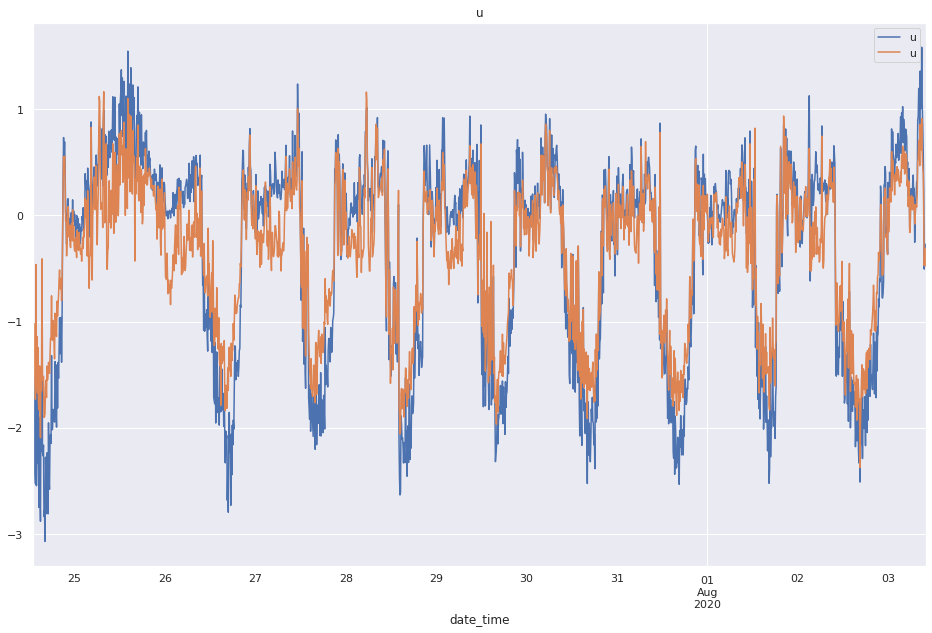

In [ ]:
plot_components(resample([wm1, m6r], '8min'), 'u')

# Conclusion

Overall this is what is seems what needs to be done:

- Invert the u
- Invert the v
- Rotate by 27° N